In [9]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string




In [12]:
import pandas as pd

data = pd.read_csv('../artifacts/sentiment_analysis.csv')



In [13]:


data.head()



,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [14]:


data.shape



(7920, 3)

## DATE PREPOCESSING

In [12]:


data.duplicated().sum()



np.int64(0)

In [15]:


data.isnull().sum()



id       0
label    0
tweet    0
dtype: int64

In [16]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

## text preprocessing

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove links

In [16]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

## remove punctuations

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [30]:


data["tweet"].tail(10)



7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [32]:


data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)



In [33]:

data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [34]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------------------

In [35]:
import nltk

In [36]:


nltk.download('stopwords', download_dir='../static/model')



[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [38]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [39]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [40]:

data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    completely love new iphone emojis iphone apple...
7912    tune turn drop gtd one app mobile mind meditat...
7913    ok galaxy crashed one day wait til monday skyr...
7914    gain followers rt must follow follow back foll...
7915    live loud lol liveoutloud selfie smile sony mu...
7916    would like wish amazing day make every minute ...
7917    helping lovely year old neighbor ipad morning ...
7918    finally got smart pocket wifi stay connected a...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## Stemming

In [20]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import pandas as pd

# Example: Load CSV file into 'data'
data = pd.read_csv("../artifacts/sentiment_analysis.csv")

In [7]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [22]:
data["tweet"].tail(10)

7910    Perfect match #instagood #applewatch #red #ins...
7911    I am completely in love with the new iPhone em...
7912    Tune in. Turn on. Drop out. & #GTD in one app!...
7913    Ok so my galaxy crashed after one day now I ha...
7914    Gain Followers RT This MUST FOLLOW ME I FOLLOW...
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, dtype: object

In [19]:
from collections import Counter
vocab = Counter()

In [20]:


vocab



Counter()

In [24]:


for sentence in data['tweet']:
    vocab.update(sentence.split())



In [12]:
len(vocab)

28459

28459

In [22]:


tokens = [key for key in vocab if vocab[key] > 10]



In [23]:
len(tokens)

0

In [15]:


data.shape



(7920, 3)

In [27]:


tokens



['#android',
 '#apps',
 '#beautiful',
 '#cute',
 '#health',
 '#igers',
 '#iphoneonly',
 '#iphonesia',
 '#iphone',
 'Finally',
 'a',
 'case',
 'Thanks',
 'to',
 'my',
 ':)',
 '#yay',
 '#Sony',
 '#Xperia',
 'We',
 'love',
 'this!',
 'you',
 '#relax',
 '#smartphone',
 '#wifi',
 "I'm",
 'I',
 'know',
 'was',
 'made',
 'that',
 'way',
 ';)',
 '#home',
 'What',
 'amazing',
 'Apple',
 "won't",
 'even',
 'me',
 'about',
 'have',
 'pay',
 'them',
 'for',
 'their',
 'stupid',
 'iPhone',
 'software',
 'update',
 'fucked',
 'up',
 'phone',
 'big',
 'time',
 'Stupid',
 'iPhones',
 'Happy',
 'us',
 '..',
 '#instapic',
 '#instadaily',
 '#sony',
 '#xperia',
 'New',
 'charger',
 'cable',
 '…',
 'Year',
 '2018',
 '#technology',
 '#iPhoneX',
 'go',
 'again',
 'music',
 '#music',
 '#likeforlike',
 'Photo:',
 '#fun',
 '#selfie',
 '#water',
 '#camera',
 '#picoftheday',
 '#sun',
 '#instagood',
 '#boy',
 '#apple',
 'when',
 'make',
 'new',
 'ipod',
 'dont',
 'it',
 'or',
 'not',
 'every',
 'Not',
 'but',
 'do

In [28]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide Dataset

In [29]:
X = data['tweet']
y = data['label']

In [30]:


!pip install scikit-learn




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:


!pip install scikit-learn



   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 631.0 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/8.7 MB 631.0 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.7 MB 677.5 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/8.7 MB 747.7 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.7 MB 788.7 kB/s eta 0:00:10
   ------- -------------------------------- 1.6/8.7 MB 816.7 kB/s eta 0:00:09
   -------- ------------------------------- 1.8/8.7 MB 866.4 kB/s eta 0:00:08
   --------- ------------------------------ 2.1/8.7 MB 907.3 kB/s eta 0:00:08
   ---------- -----------------

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:


X_train



796     Black Friday Follow @creativebanana_ #blackfri...
6818    About time ;) #samsunggalaxys3 #Samsung #bestp...
3690    I'm so sick of this iPhone. I need my upgrade ...
201     Family #family #friends #beauty #fun #cuties #...
5617    smile every day and be yourself :) #zurich #sw...
                              ...                        
4737    Stupid Mac... and yet my imaginary computer st...
5329    Welcome to the family!!! Bienvenido a la famil...
4576    Goodbye Christmas....boxingday...new years.......
6348    The lady just said everyone wants and needs an...
3818    Hey Guys! Look Apple-iPhone-X-256GB-Silver-Unl...
Name: tweet, Length: 6336, dtype: object

In [33]:


X_test



1881    #best #friend #gift #samsung #cover #golden Im...
3665    We would like to wish you an amazing day! Make...
2328    I love you. #flower #blossom #sky #instadaily ...
3110    To the $&@*# who stole my iPod, fuck you I'm p...
791     Shot on iPhone X . . #iphone #apple #iphonex #...
                              ...                        
1282    Agreeing to update your iPod is the worst deci...
2769    New look forma my phone #cover #xmascover #cou...
4366    Kinda wish I would've thought this through... ...
4521    So I break my phone and they make me pay $169 ...
597     Look at what I got today #dying #Samsung #s5 #...
Name: tweet, Length: 1584, dtype: object

In [34]:
y_test
import numpy as np


In [45]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [46]:
vectorized_x_train = vectorizer(X_train, tokens)

In [47]:


vectorized_x_test = vectorizer(X_test, tokens)



In [43]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install --upgrade --force-reinstall scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

  Att

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [35]:


y.value_counts()




label
0    5894
1    2026
Name: count, dtype: int64

In [5]:
pip install --upgrade imbalanced-learn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.7.1

   ---------------------------------------- 0/3 [scikit-learn]
    Uninstalling scikit-learn-1.7.1:
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
      Successfully uninstalled scikit-learn-1.7.1
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   ---------------------------------------- 0/3 [scikit-learn]
   -----------------------------

  You can safely remove it manually.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import sklearn
print(sklearn.__version__)

1.7.1


In [3]:
import sklearn
print(sklearn.__version__)


1.6.1


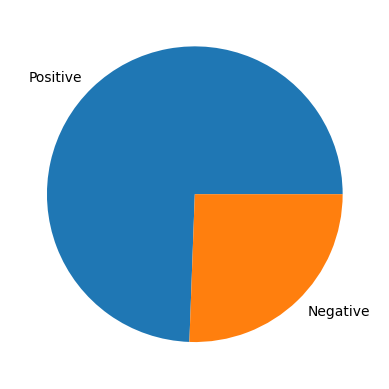

In [38]:


plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: vectorizing the training set
vectorizer = TfidfVectorizer()
vectorized_x_train = vectorizer.fit_transform(X_train)

# Now apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

print(vectorized_x_train_smote.shape, y_train_smote.shape)


(9422, 19744) (9422,)


In [37]:


vectorized_x_train_smote



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 195467 stored elements and shape (9422, 19744)>

In [41]:


y_train_smote



0       0
1       0
2       1
3       0
4       0
       ..
9417    1
9418    1
9419    1
9420    1
9421    1
Name: label, Length: 9422, dtype: int64

In [48]:


vectorized_x_test



array([], shape=(1584, 0), dtype=float32)

In [43]:
y_test

1881    0
3665    0
2328    0
3110    1
791     0
       ..
1282    1
2769    0
4366    1
4521    1
597     0
Name: label, Length: 1584, dtype: int64

## Model building and  Evaluation

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC